# Testing Shape Clustering Based on Procrustes

We summarize the results on shape clustering, obtained thus far, using K-means and Procrustes alignment based distance. We show the results for the MNIST digits dataset and for syntetic ellipses.

In [1]:
from wand.image import Image as WImage
from IPython.display import Image

## MNIST Digits

We extract shapes from images as follows. First, we extract contours from an image. Each image can have multiple contours. Second, we pick the outside contour only, and neglect inner contours. Third, we interpolate the points from the resulting contour. This allows us to pick $n$ landmark points from this contour. In this manner, each image is represented by a matrix $X \in \mathbb{R}^{n\times2}$, where each row is one landmark point. 

For the MNIST digits dataset the above process is illustrated below. In the last row, each shape contains $n$ landmark points.

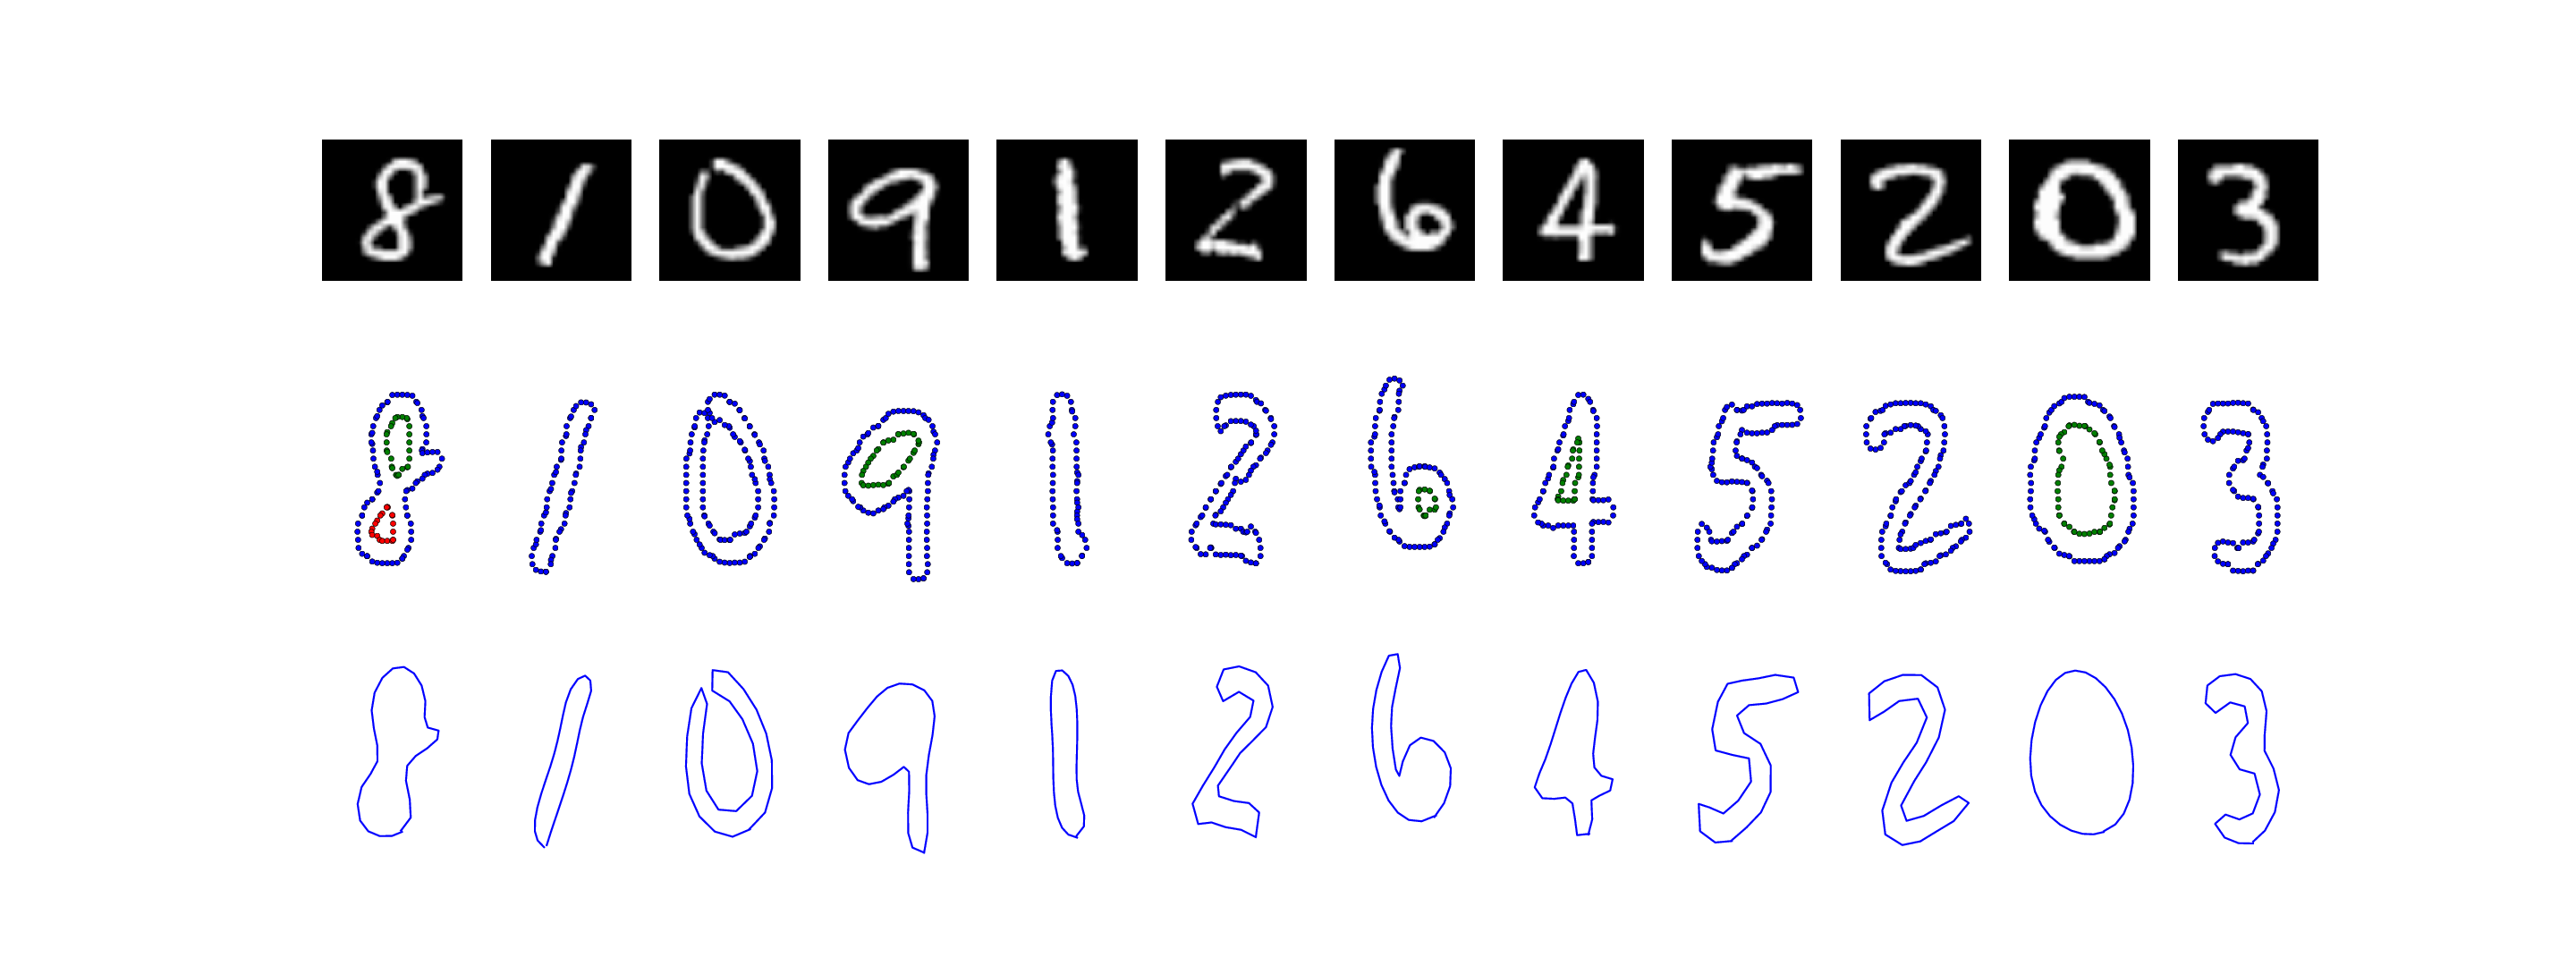

In [8]:
WImage(filename="figs/digits_shape.pdf")

The Procrustes distance is obtained by removing translation, rotation, and scaling, between two different shapes $X$ and $Y$, both containing $n$ landmark points. This is illustrated below with a class of digits. In the last two columns we compute the Procrustes distance without cycling the points, and with a cycli permutation fo the points, respectivelly. When the later procedure, we consider the best cyclic permutation of the points. This gives a better alignment, but in practice is more expensive, since we have to apply Procrustes alignment $n$ times.
The final distance computed is simply the Euclidean distance of the aligned points.

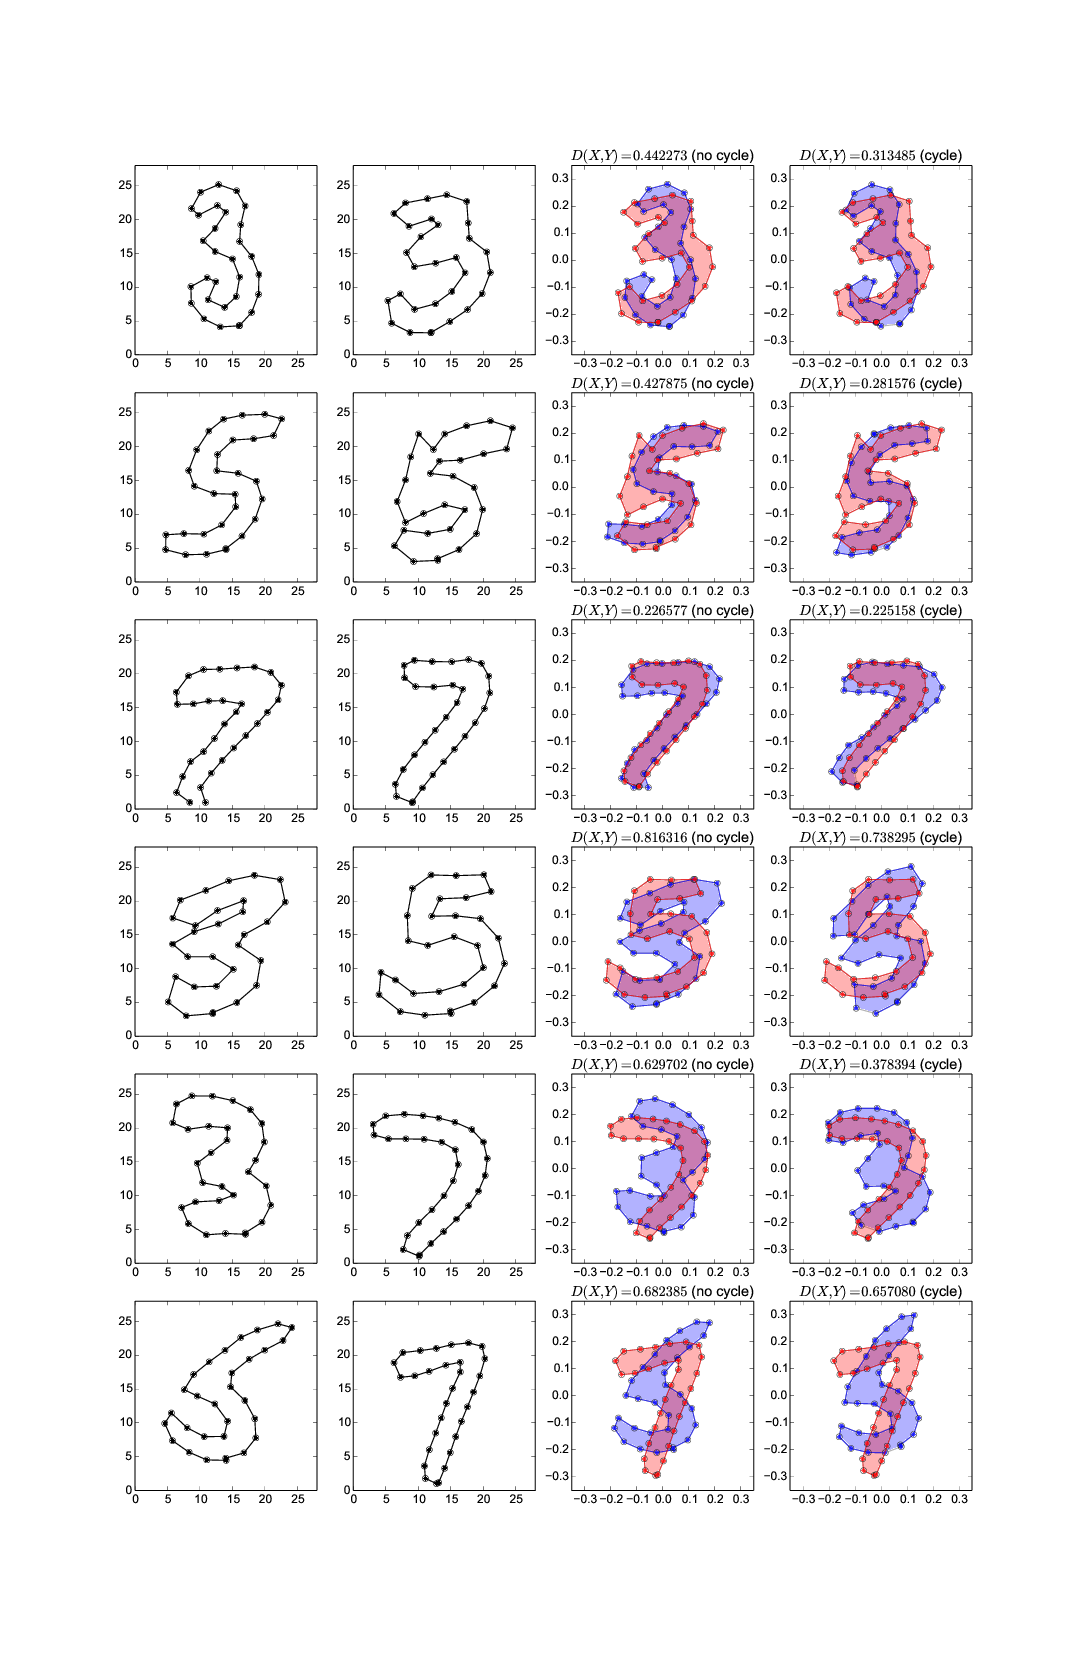

In [19]:
WImage(filename="figs/alignment_digits.pdf")

Now we use the above Procrustes distance into K-means clustering algorithm. We do not cycle through the points, since a 7 could be rotated into a 1 for instance. We compare the results with a purelly K-means clustering, which uses Euclidean distance. We plot the misclassification error versus $n$, where $n$ is the (same) number of elements in each cluster.

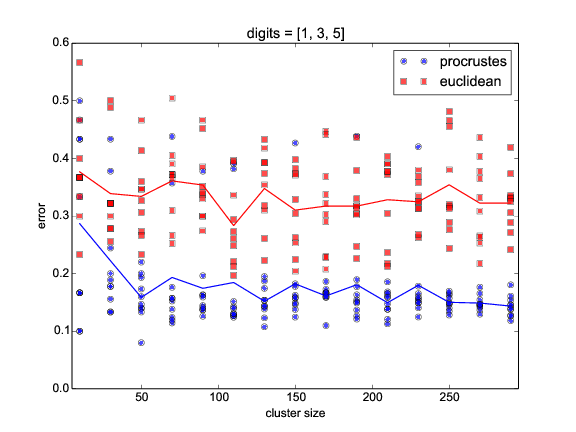

In [5]:
WImage(filename='figs/mnist_procrustes_euclidean_135.pdf')

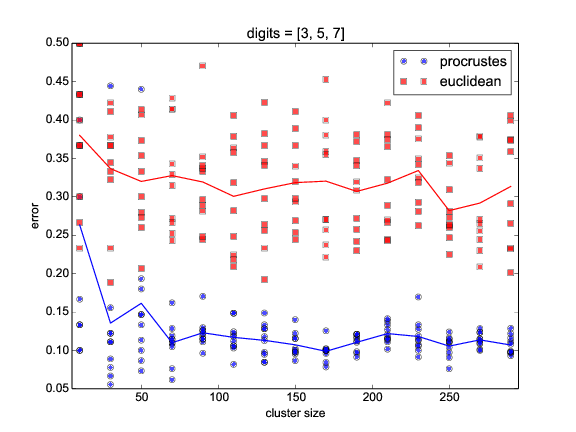

In [6]:
WImage(filename='figs/mnist_procrustes_euclidean_357.pdf')

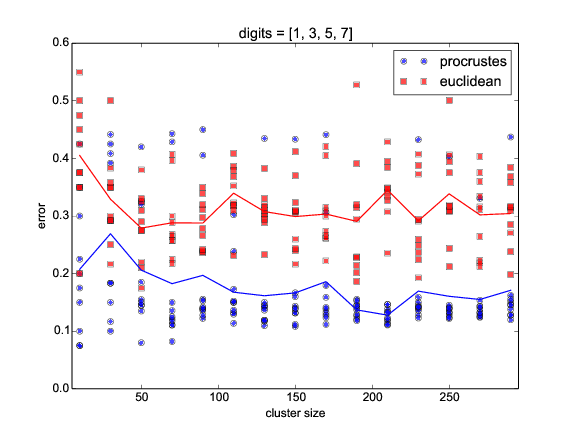

In [7]:
WImage(filename='figs/mnist_procrustes_euclidean_1357.pdf')

Now we show an example where images with holes is problematic under this approach. This is obvious since we are neglecting the holes completely, while K-means still consider the wholes since it works on the original images.

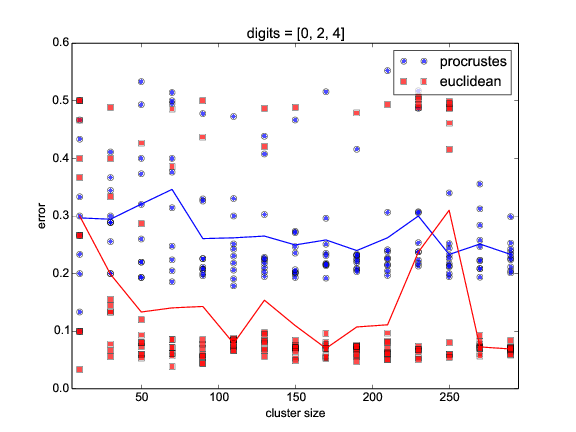

In [9]:
WImage(filename='figs/mnist_procrustes_euclidean_024.pdf')

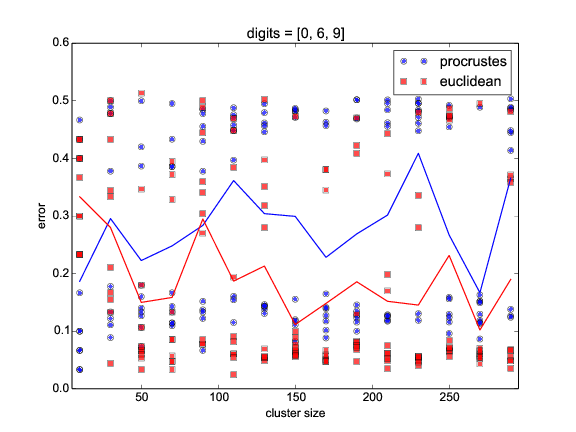

In [10]:
WImage(filename='figs/mnist_procrustes_euclidean_069.pdf')

## Ellipses

Now we test three different cases for shapes based on ellipses.

1. For each class we choose the axis $(a,b)$, then for each of the $n$ elements within this class we pick a random translation vector $T$ and a random rotation $R$, and also a random scaling $s$, and apply the following transformation to the points on the ellipse: $x_i \to s R x_i + T$. In this way we generate a cluster with different ellipses, all of them sharing the ratio $a/b$ in common.
2. We do the same thing as before, but for each class defined by $(a,b)$, besides the rotation, translation, and scaling, we add noise to the axis: $(a,b)\to (a+\delta_1, b+\delta_2)$ where $\delta_i$ is picked at random from a uniform distribution. Now the elements within each cluster are different and do not share the ratio $a/b$ anymore.
3. Here we first generate the ellipse as in item 1 above, and then randomly add noise to the points themselves, i.e. if $x_i$ denote one point over the ellipse, then we add
$(x_{i,x},x_{i,y}) \to (x_{i,x} +\delta_x, x_{i,y}+\delta_y)$ where $\delta$ is a random number picked from uniform distribution. In this way the final shape is a deformation of the original ellipse.

### Case 1

One can see below that for ellipses without noise, the Procrustes distance can find a perfect matching between elements of the same class. The clusterig method works with 100% accuracy in this case.

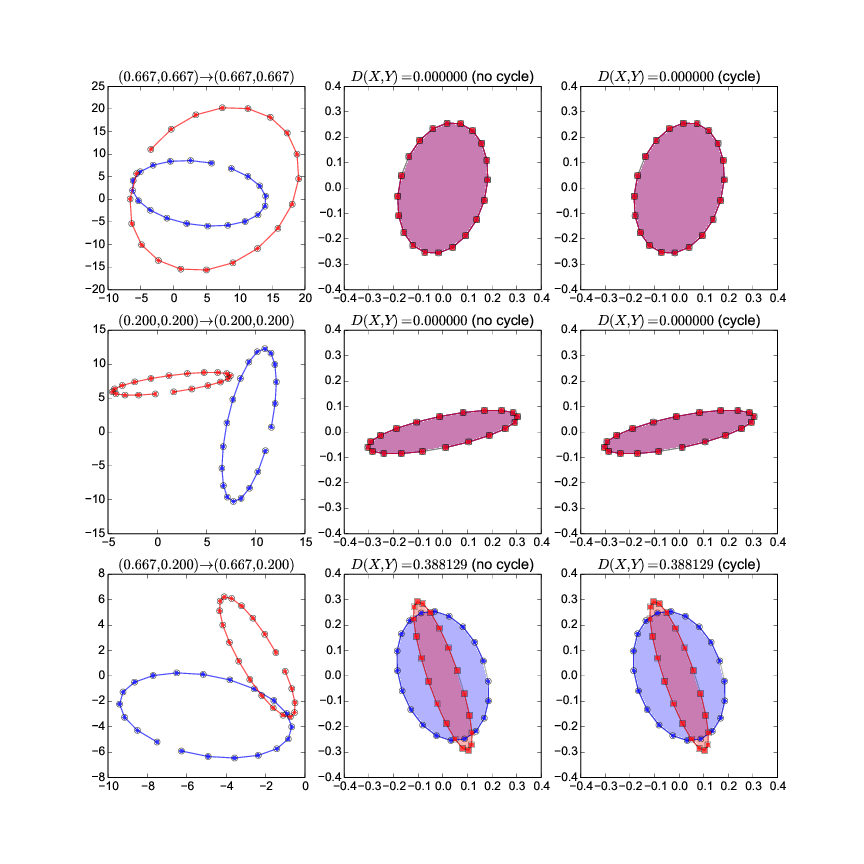

In [4]:
WImage(filename="figs/ellipse_without_noise.pdf")

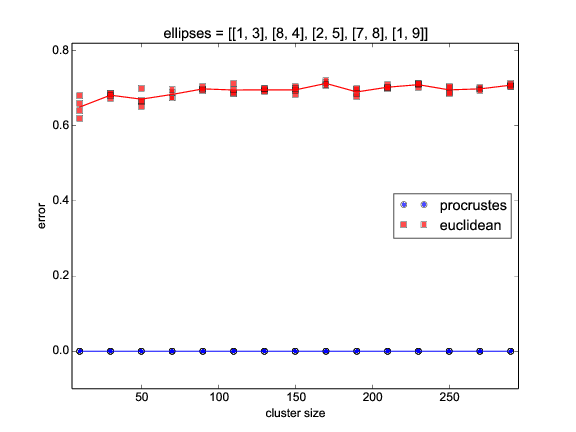

In [8]:
WImage(filename='figs/ellipse_procrustes_euclidean.pdf')

### Case 2

Now we add some noise. In the example below we chose two classes with $(a,b) \in \{ (1,3), (2,5) \}$, and we add noise with $0.05 \times Uni(-1,1)$ to the axes. One must be carefull to not add too much noise and distort the ellipses in the same class too much.

In the clustering we chose the noise $0.007\times Uni(-1,1)$.

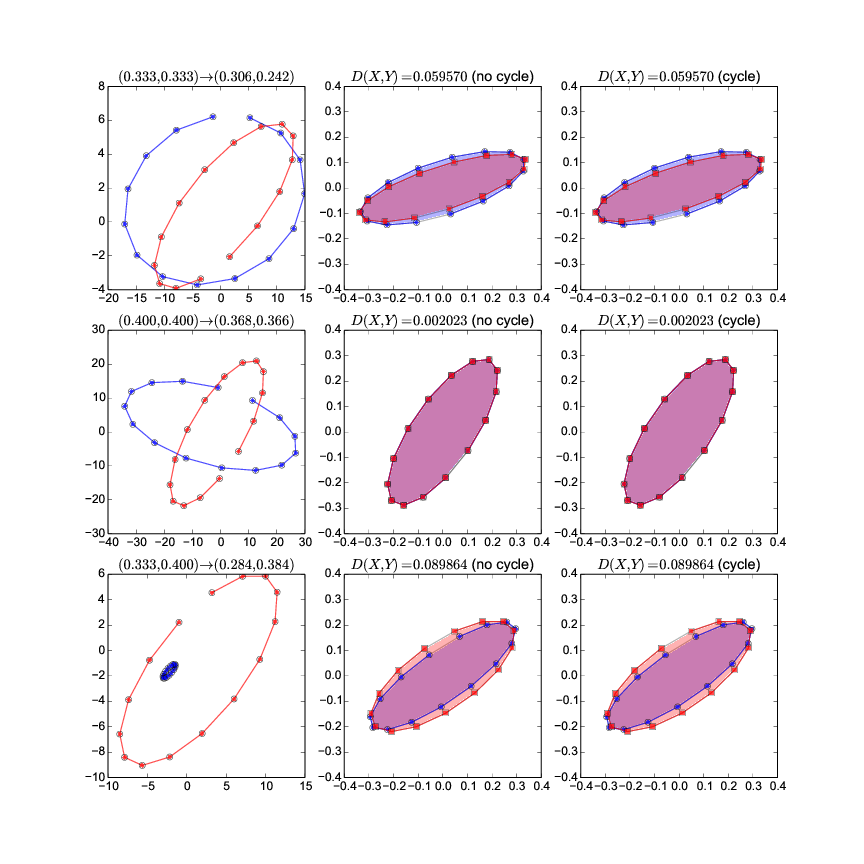

In [7]:
WImage(filename="figs/ellipse_noise1.pdf")

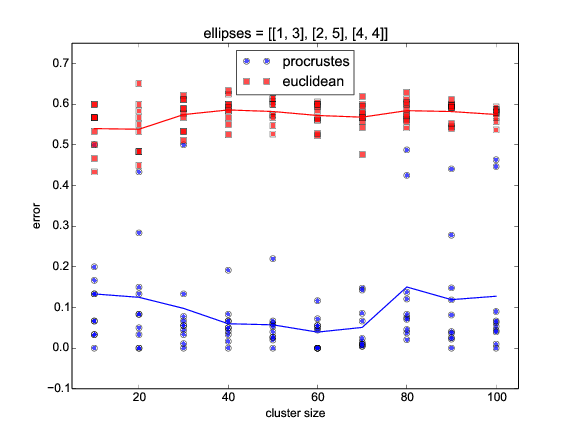

In [9]:
WImage(filename='figs/ellipse_noise_procrustes_euclidean.pdf')

### Case 3

Here we add noise to the points. One can must be carefull on how much noise to add.

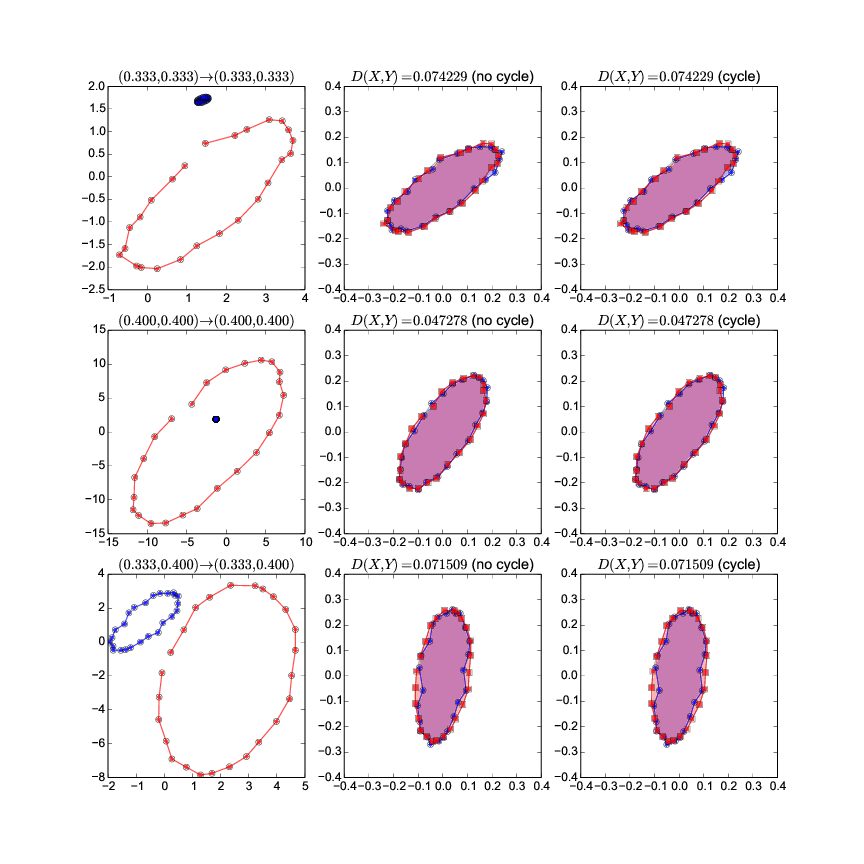

In [8]:
WImage(filename="figs/ellipse_noise2.pdf")

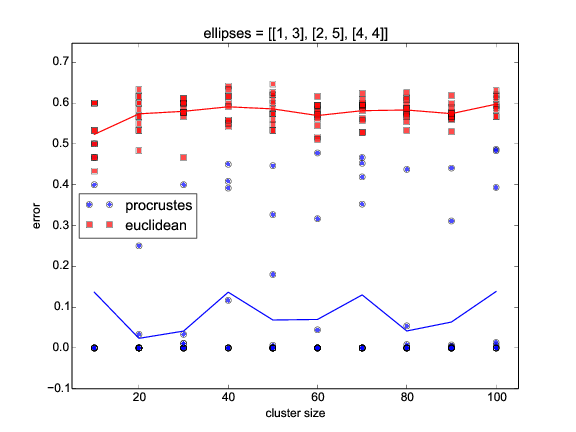

In [10]:
WImage(filename='figs/ellipse_random_procrustes_euclidean.pdf')

One thing that we observed above is that the clusters were "collapsing" for some of the samples, i.e. we start K-means with K clusters and end up with only 1 cluster. Restarting the algorithm fixes this most of the times, which shows that it can be a poor initialization, however sometimes it doesn't fix that, so we disregard that sample an pick another one in this case. This is particular clear why from the above example, where too much noise can destroy similarities between elements of the same class.

### Literature Results on Clustering the Digits

In ""Scalable Sparse Subspace Clustering by Orthogonal Matching Pursuit", Vidal, 2016,
they consider $N_i \in \{ 50, 100, 200, 400, 600 \}$ randomly chosen for each of the 10 digits. For each image they compute a feature vector from a convolution network. Each vector is 3472 dimensional. They project this into 500 dimensions using PCA. The subspace clustering is then applied to this. Some example of accuracy (1-missclassification error) for different methods are the following (in %):

$$
\begin{array}{l|ccccc}
N_i & 50 & 100 & 200 & 400 & 600 \\
\hline
SSC-OMP & 83.64 & 86.67 & 90.60 &91.22 &91.25 \\
SSC-BP &83.01 & 84.06 &85.58 &86.00 &85.60\\
LSR & 75.84 &78.42 &78.09 &79.06 &79.91\\
LRSC & 75.02 &79.76 &79.44 &78.46 &79.88\\
SCC & 53.45 &61.47 &66.43 &71.46 &70.60
\end{array}
$$

In http://yann.lecun.com/exdb/mnist/ there is a table for the classification error (%)
using several methods. However, classification is not the same as clustering. Anyway, the best error is around 0.2% which is pretty low. This is a neural network, which is supervised learning. Linear classifiers do around 10%. K=3 nearest neighbor do around 5%. See also 
https://en.wikipedia.org/wiki/MNIST_database.


In "Supervised and Unsupervised Clustering with Probabilistic Shift", Shetty, 2010??,
http://vision.ai.illinois.edu/publications/shetty_eccv10.pdf. It's not clear what they do, but I think they consider pair-wise digits (2 clusters) and all digits (10 clusters) with 10000 points, however I don't know if the clusters are balanced. On average they get the following error (%) for K=10 (note that this is a supervised clustering)
$$
\begin{array}{cccc}
KM & NC & 1s-SC & SCVK1 & SCVK2 \\
\hline
38.54 & 80.56 & 59.49 & 16.2 & 17.3
\end{array}
$$
They tried to detect the number of clusters (unsupervised), and none of their methods found K=10.

In "Learning Transformations for Clustering and Classification", Sapiro, 2015, they propose a low-rank transformation learning framework. They improve subspace clustering by learning a linear transformation on subspaces. My guess is that this is supervised, but I'm not sure (check later). They cluster several cases with two, three, and so on. They get pretty low errors, for instance for $\{2,4,8\}$ they get 7% error. I think they pick 200 points for each cluster. Denote $[0:c]$ the classes of digits up to $c$. They obtain the following error with 100 points from each class
$$
\begin{array}{9}
c & 1 &2 &3 &4 &5 &6 &7 &8 \\
\hline
error & 0 & 3.88 & 3.89 & 5.31 & 14.04 & 13.79 & 14.50 & 16.05
\end{array}
$$

## MNIST Digits with Various Contours

Now we keep internal contours creating a shape for of $n$ points for each contour. This is illustrated below. Sometimes this still gives something weird.

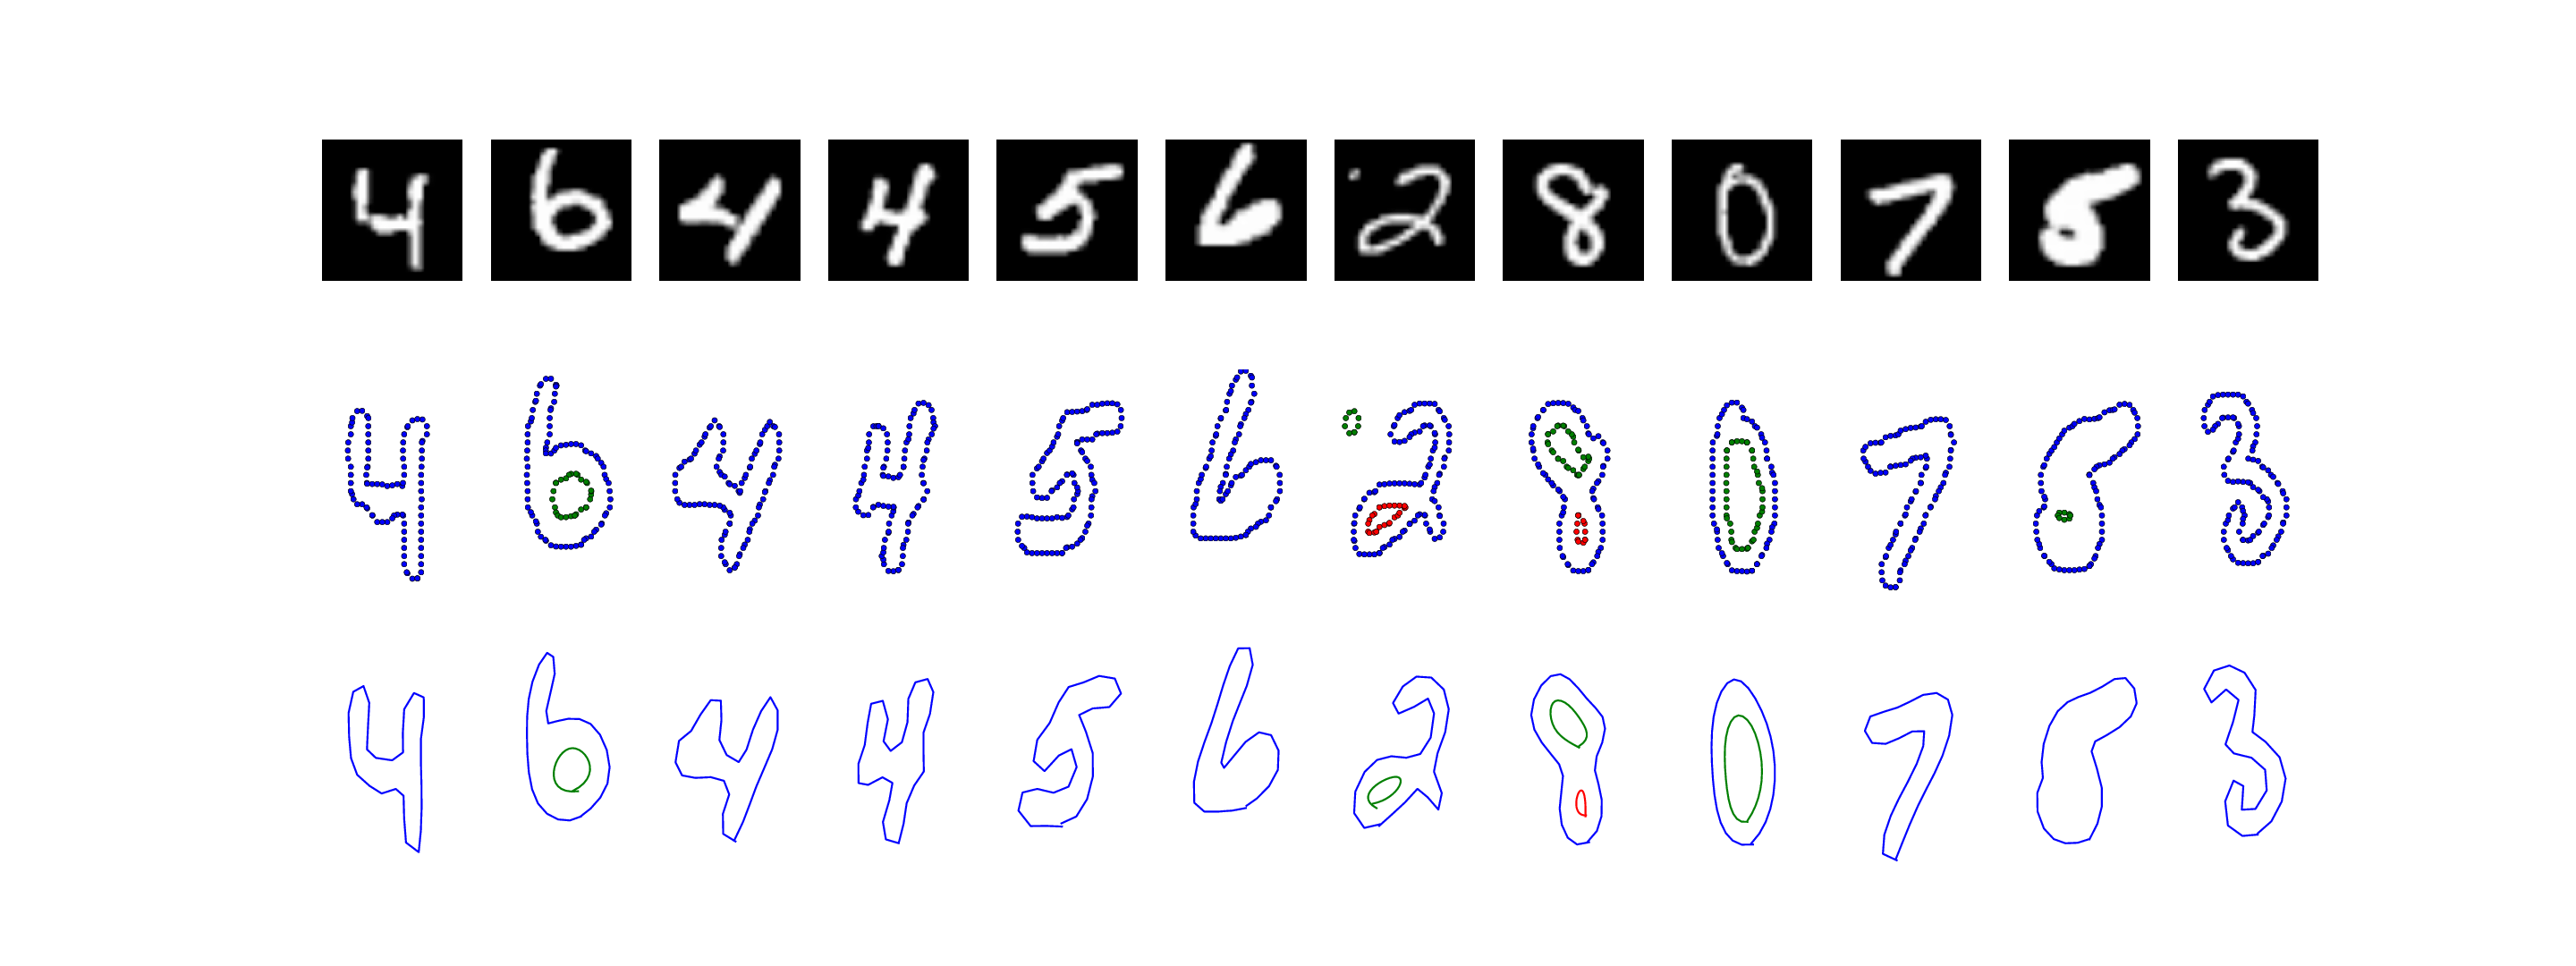

In [12]:
WImage(filename="figs/digits_multi_shapes.pdf")